<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project3/Project3_Alshawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ahmad Alshawaf
<br>ID: aa726755</br>
Course: Advanced Machine Learning - CSC 685
<br>Project # 3</br>

In this project,we are going to build Multiclass Classifiers, such SVM and KNN using data before and after normalization and preprosessing. To compare the result of accuracy, confusion matrix, precesion and recall and see which one is better than the others.

In [0]:
#from six.moves import cPickle

In [0]:
#def load_batch(fpath):
#        with open(fpath, 'rb') as f:
#            d = cPickle.load(f, encoding='bytes')  
#        data = d[b'data']
#        labels = d[b'labels']
#        data = data.reshape(data.shape[0], 3, 32, 32)
#        return data, labels

In [0]:
#data, labels = unpickle('cifar-10-python.tar.gz')

In [0]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import seaborn as sns
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

#Loading Data

In this step, I loaded data from keras dataset using 'cifar10.load_data()'. This method return two tuples, training and testting tuples.

In [0]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Exploring Data

Here we are expolring data by looking at matrix of each set, which helps to prepross and reduce dimensionality. 

In [135]:
x_train.shape

(50000, 32, 32, 3)

As in the above, the x_training set (predictors) has 50,000 rows and each row has 32x32x3, which is the last value (3) is the channel (red,green,blue)

In [136]:
y_train.shape

(50000, 1)

In the above, the y_train set (labels) has 50,000 rows and one column.

The same things, for the below tesing sets

In [137]:
x_test.shape

(10000, 32, 32, 3)

In [138]:
y_test.shape

(10000, 1)

In the below, let disply the first item in the x_train and y_train set


In [139]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [140]:
y_train[0]

array([6], dtype=uint8)

In [141]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [142]:
y_train[4]

array([1], dtype=uint8)

In [143]:
y_test[0]

array([3])

In [144]:
y_test[0][0]

3

In the below, the label_classes is to be used to get the name of the class that result of of the y_train or test. For example, if the output of y_train is 3 so the class label (name) is 'cat.

In [0]:
label_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Here, We are showing the first 25 images in the x_train

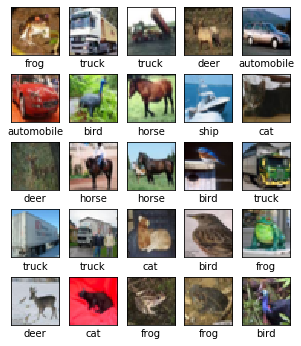

In [146]:
plt.figure(figsize=(5,6))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(label_classes[y_train[i][0]])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

#Normalizing and Preprossessing Data

Reshaping data from 32x32x3 to 1x3072. So, the first 32x32=1024 pixels are for the 1st channel, the second 1024 pixles are for the 2nd channel and the third 1024 pixels are for the 3rd channel.

In [147]:
image_size = 32*32*3
image_size

3072

Reshape x_train set

In [148]:
x_train = x_train.reshape(x_train.shape[0],image_size)
x_train.shape

(50000, 3072)

In [149]:
x_train[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

Reshape x_test set

In [150]:
x_test = x_test.reshape(x_test.shape[0],image_size)
x_test.shape

(10000, 3072)

In [151]:
x_test[0]

array([158, 112,  49, ...,  21,  67, 110], dtype=uint8)

Make a copy to be used later

In [0]:
x_train_original = x_train
y_train_original = y_train
x_test_original = x_test
y_test_original = y_test

encoding labels from normal digits to binary code to high preformance for machine learning. For example, 1 to 0100000000

In [0]:
#number of category in dataset
num_classes = 10

In [0]:
onEncode=OneHotEncoder()
y_train = onEncode.fit_transform(y_train)
y_test = onEncode.transform(y_test)
#y_train = keras.utils.to_categorical(y_train,num_classes)
#y_test = keras.utils.to_categorical(y_test,num_classes)

In [72]:
y_train.shape

(50000, 10)

In [73]:
y_test.shape

(10000, 10)

In the below the y_train[0] before encoding was 6. After encoding is 0000001000. Also, for y_train[4] before encoding was 1. After encoding  is 0100000000

In [74]:
y_train[0].toarray()

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [75]:
y_train[4].toarray()

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Now, we need to scale data to be from -1 to 1. This will help to fast performance and high accuracy.

In [76]:
#Before Scaleing
x_train[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

In [77]:
#Before Scaleing
x_test[0]

array([158, 112,  49, ...,  21,  67, 110], dtype=uint8)

In [0]:
#Do the Scaleing
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.fit_transform(x_test)

In [79]:
#After Scaleing
x_train[0]

array([-0.97682401, -1.01575822, -0.86457067, ..., -0.05604997,
       -0.54031962, -0.6414024 ])

In [80]:
#After Scaleing
x_test[0]

array([ 0.37453661, -0.3308194 , -1.04617293, ..., -1.63392961,
       -0.95137489, -0.08113244])

#Reducing Dimensionality

##PCA using Scikit-Learn

we will use the Scikit_learn lib to apply PCA(Principal component analysis) for reducing the dimensiolity of MNIST data set

copy the x_train and x_test

In [0]:
pca_x_train = x_train
pca_x_test = x_test

Applying PCA, to reduce the mnist from 784 dimension to dimension that produce 95% varience ratio

In [0]:
from sklearn.decomposition import PCA

#reduce the mnist from 784 dimension to dimension that produce 95% varience ratio
pca_alg = PCA(n_components=0.95)
#apply the model and apply the reduction on pca_x_train
pca_x_train = pca_alg.fit_transform(pca_x_train)
pca_x_test = pca_alg.transform(pca_x_test)

Confirm the variance ratio

In [83]:
pca_alg.explained_variance_ratio_.sum()

0.9501531268225829

check the x_train and x_test after applying PCA

In [84]:
pca_x_train.shape

(50000, 221)

In [85]:
pca_x_test.shape

(10000, 221)

From the above, you notice the x_train and x_test dimension reduced from 1x3072 to 1x221

##Applying t-SNE Model

builing t-SNE to reduce the dimensiolity from 3072 to 221

Copy the x_train and x_test

Because tsne requires long time to process  50,000 rows. So, I going to use 1,000 rows only

In [0]:
tsne_x_train = x_train[:1000]
tsne_x_test = x_test[:1000]

In [46]:
tsne_x_train.shape

(1000, 3072)

In [293]:
tsne_x_test.shape

(1000, 3072)

Applying t-SNE Module

In [0]:
from sklearn.manifold import TSNE
#Build the tsne to reduce data to 2 dimension
tsne_alg = TSNE(n_components=2,random_state=91,perplexity=15)
#Apply the tsne model
tsne_x_train_reduced = tsne_alg.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne_alg.fit_transform(tsne_x_test)

check the x_train and x_test after applying tsne

In [295]:
tsne_x_train_reduced.shape

(1000, 2)

In [296]:
tsne_x_test_reduced.shape

(1000, 2)

In the below,a custom method to combine the training data with labels

In [0]:
def compine(x,y):
  x_y = np.vstack((x.T,y)).T
  df = pd.DataFrame(data=x_y, columns=('col1','col2','label'))
  return df

In the below, a custom method to generate a scatter figure

In [0]:
import matplotlib.patheffects as PathEffects

def plot_digits(x,y,title):
  tsne_pdf = compine(x,y)
  sns.FacetGrid(tsne_pdf,hue='label',size = 6).map(plt.scatter,'col1','col2')
  plt.legend(loc='best')
  plt.title(title)
  plt.show()

t-SNE with perplexity=15

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


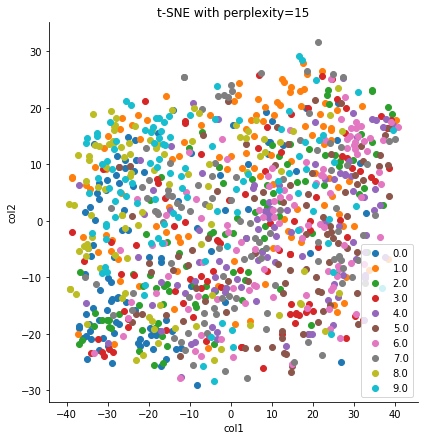

In [299]:
plot_digits(tsne_x_train_reduced,y_train_original[:1000,0],'t-SNE with perplexity=15')

Reapet tsne with preplexity = 25

In [0]:
#Build the tsne to reduce data to 2 dimension
tsne_alg = TSNE(n_components=2,random_state=91,perplexity=25)
#Apply the tsne model
tsne_x_train_reduced = tsne_alg.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne_alg.fit_transform(tsne_x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


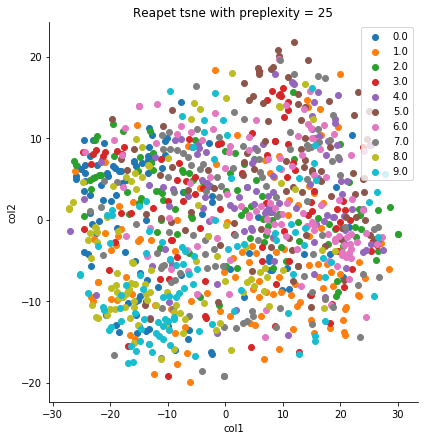

In [301]:
plot_digits(tsne_x_train_reduced,y_train_original[:1000,0],'Reapet tsne with preplexity = 25')

Reapet tsne with preplexity = 50

In [0]:
#Build the tsne to reduce data to 2 dimension
tsne_alg = TSNE(n_components=2,random_state=91,perplexity=50)
#Apply the tsne model
tsne_x_train_reduced = tsne_alg.fit_transform(tsne_x_train)
tsne_x_test_reduced = tsne_alg.fit_transform(tsne_x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


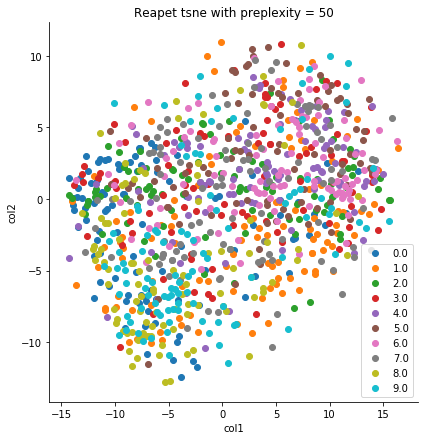

In [303]:
plot_digits(tsne_x_train_reduced,y_train_original[:1000,0],'Reapet tsne with preplexity = 50')

#Building Multiclass Classifiers

I am going to use small size of the training data as Classifiers take long time to build the models. Then, I have to stratified data to get all cases with their corresponindg ratio in data

In [0]:
x_train_split_90_org,x_test_split_10_org,y_train_split_90_org,y_test_split_10_org = train_test_split(x_train_original,
                                                                                                     y_train_original,test_size=0.10,
                                                                                                     random_state=120)

Check the returns

In [87]:
#check if all labels are there
np.unique(y_train_split_90_org)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [306]:
x_train_split_90_org.shape

(45000, 3072)

In [307]:
y_train_split_90_org.shape

(45000, 1)

In [308]:
x_test_split_10_org.shape

(5000, 3072)

In [309]:
y_test_split_10_org.shape

(5000, 1)

Do the split again on the x_test_split_10_org and y_test_split_10_org to get 70% for training and 30% for testing

In [0]:
x_train_org_small, x_test_org_small,y_train_org_small,y_test_org_small = train_test_split(x_test_split_10_org,y_test_split_10_org,test_size=0.30,
                                                                                          random_state=120)

check the returns

In [311]:
#check if all labels are there
np.unique(y_train_org_small)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [312]:
x_train_org_small.shape

(3500, 3072)

In [313]:
y_train_org_small.shape

(3500, 1)

In [314]:
x_test_org_small.shape

(1500, 3072)

In [315]:
y_test_org_small.shape

(1500, 1)

In [0]:
svm_skf_org=StratifiedKFold(n_splits=5,random_state=62,shuffle=True)

for train_index, test_index in svm_skf_org.split(x_train_org_small,y_train_org_small):
    x_train_temp = x_train_org_small[train_index]
    y_train_temp = y_train_org_small[train_index]
    x_test_temp = x_train_org_small[test_index]
    y_test_temp = y_train_org_small[test_index]
x_train_org_small = x_train_temp
y_train_org_small = y_train_temp
x_test_org_small = x_test_temp
y_test_org_small = y_test_temp

check results

In [334]:
x_train_org_small.shape

(2800, 3072)

In [335]:
y_train_org_small.shape

(2800, 1)

In [336]:
x_test_org_small.shape

(700, 3072)

In [337]:
y_test_org_small.shape

(700, 1)

Do the same thing for pca data

In [0]:
x_train_split_90,x_test_split_10,y_train_split_90,y_test_split_10 = train_test_split(pca_x_train,y_train,test_size=0.10,
                                                                                                     random_state=250)

In [339]:
x_train_split_90.shape

(45000, 221)

In [340]:
y_train_split_90.shape

(45000, 10)

In [341]:
x_test_split_10.shape

(5000, 221)

In [342]:
y_test_split_10.shape

(5000, 10)

In [0]:
x_train_small, x_test_small,y_train_small,y_test_small = train_test_split(x_test_split_10,y_test_split_10,test_size=0.30,
                                                                                          random_state=250)

In [344]:
x_train_small.shape

(3500, 221)

In [345]:
y_train_small.shape

(3500, 10)

In [346]:
x_test_small.shape

(1500, 221)

In [347]:
y_test_small.shape

(1500, 10)

In [0]:
svm_skf_org=StratifiedKFold(n_splits=5,random_state=62,shuffle=True)
#Here i inverse the y_train_small fron one hot encoded to its original values
for train_index, test_index in svm_skf_org.split(x_train_small,onEncode.inverse_transform(y_train_small)):
  x_train_temp = x_train_small[train_index]
  y_train_temp = y_train_small[train_index]
  x_test_temp = x_train_small[test_index]
  y_test_temp = y_train_small[test_index]

x_train_small = x_train_temp
y_train_small = y_train_temp
x_test_small = x_test_temp
y_test_small = y_test_temp

check the results

In [93]:
x_train_small.shape

(2800, 221)

In [353]:
y_train_small.shape

(2800, 10)

In [0]:
x_test_small.shape

(700, 221)

##SVM

### SVM (Support-Vector Machines) using original data (before normalization)


In [183]:
svm_model = svm.SVC(random_state=30)
time1 = time.time()
svm_model.fit(x_train_org_small,y_train_org_small)
time2 = time.time()
svm_original_time = time2 - time1
print('SVM with original data takes {:.1f} seconds'.format(svm_original_time) )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM with original data takes 54.4 seconds


Get the score of the SVM model using original test data.

In [184]:
svm_acc_org=svm_model.score(x_test_org_small,y_test_org_small)
svm_acc_org

0.41285714285714287

Because of the data is small, I used the cross validation with k-flod = 5

In [362]:
cross_val_score(svm_model,x_test_org_small,y_test_org_small,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.42142857, 0.36428571, 0.35      , 0.3       , 0.32142857])

Generating the confusion matrics for the original testing data




In [0]:
def plot_confusion_matrix(matrix,title):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    ax.set_title(title)
    plt.axis([0,9,0,9])
    fig.colorbar(cax)

In [185]:
svm_pred_org = cross_val_predict(svm_model,x_test_org_small,y_test_org_small,cv=5)
svm_conf_matrix=confusion_matrix(y_test_org_small,svm_pred_org)
svm_conf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([[34,  2,  0,  4,  4,  0,  4,  5, 14,  5],
       [ 2, 26,  3,  3,  3,  3,  3,  3,  8, 16],
       [13,  2,  9,  4, 15,  2, 13,  2,  3,  8],
       [ 7,  4,  7, 10,  8, 12, 10,  5,  2,  4],
       [ 9,  2,  2,  3, 27,  3, 13,  3,  0,  2],
       [ 5,  3,  5, 10,  6, 22,  6,  4,  2,  2],
       [ 0,  1, 10,  3, 12,  5, 31,  4,  0,  3],
       [ 7,  5,  6,  4, 12,  3,  6, 16,  2, 15],
       [11,  2,  3,  3,  0,  3,  2,  1, 35, 12],
       [ 7,  9,  1,  3,  0,  1,  4,  4,  7, 36]])

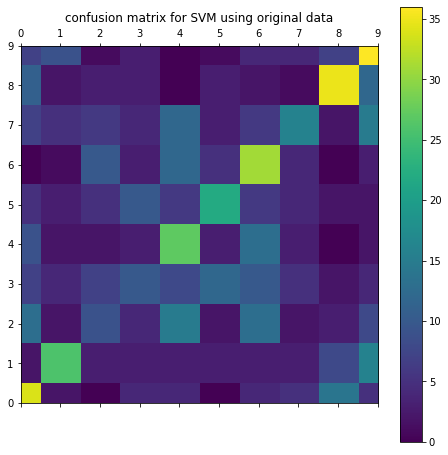

In [365]:
plot_confusion_matrix(svm_conf_matrix,'confusion matrix for SVM using original data')

from the above confusion matrix, we notice that low right prection

Now, get the precision and recall

In [186]:
svm_precision_org=precision_score(y_test_org_small,svm_pred_org,average='micro')
svm_precision_org

0.3514285714285714

In [187]:
svm_recall_org=recall_score(y_test_org_small,svm_pred_org,average='micro')
svm_recall_org

0.3514285714285714

Let genarate the precision and recall



In [0]:
#Custom method to generate plot fig
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True) 

In [419]:
svm_prec_recall_pos=cross_val_predict(svm_model,x_test_org_small,y_test_org_small,method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning: Number of classes in training fold (10) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning)


IndexError: ignored

I could not generate the precision and recal plot. It is always give me an error the above error

In [417]:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(x_test_org_small, y_test_org_small)


ValueError: ignored

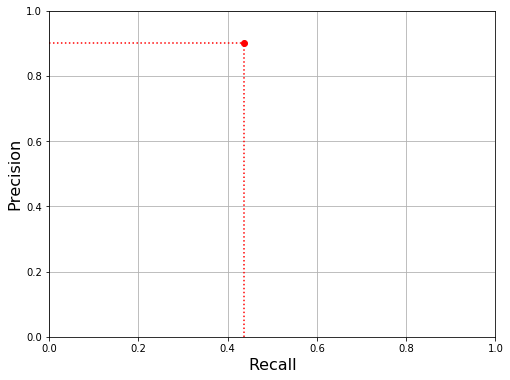

In [725]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_org,recalls_org)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [420]:
recall_90_precision = recalls_org[np.argmax(precisions_org >= 0.30)]
threshold_90_precision = thresholds_org[np.argmax(precisions_org >= 0.30)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions_org, recalls_pca, thresholds_pca)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                      
plt.show()

NameError: ignored

In [424]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(x_test_org_small, y_test_org_small,pos_label=svm_prec_recall_pos)

NameError: ignored

In [423]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

In [425]:
print(classification_report(y_test_org_small,svm_pred_org))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41        72
           1       0.46      0.37      0.41        70
           2       0.20      0.13      0.15        71
           3       0.21      0.14      0.17        69
           4       0.31      0.42      0.36        64
           5       0.41      0.34      0.37        65
           6       0.34      0.45      0.39        69
           7       0.34      0.21      0.26        76
           8       0.48      0.49      0.48        72
           9       0.35      0.50      0.41        72

    accuracy                           0.35       700
   macro avg       0.35      0.35      0.34       700
weighted avg       0.35      0.35      0.34       700



###SVM (Support-Verctor Machines) using data after normalization

In [161]:
y_train_small_reversed=onEncode.inverse_transform(y_train_small)
y_train_small_reversed

array([[2],
       [5],
       [3],
       ...,
       [3],
       [7],
       [9]], dtype=uint8)

In [0]:
y_test_small_reversed = onEncode.inverse_transform(y_test_small)

In [188]:

svm_model = svm.SVC(random_state=123)
time1 = time.time()
svm_model.fit(x_train_small,y_train_small_reversed)
time2 = time.time()
svm_time = time2 - time1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [431]:
print('SVM with PCA data takes {:.1f} seconds'.format(svm_original_time) )

SVM with PCA data takes 56.0 seconds


In [189]:
svm_acc_pca=svm_model.score(x_test_small,y_test_small_reversed)
svm_acc_pca

0.41

In [433]:
cross_val_score(svm_model,x_test_small,y_test_small_reversed,cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.30714286, 0.38571429, 0.32857143, 0.29285714, 0.32857143])

In [190]:
svm_pred_pca = cross_val_predict(svm_model,x_test_small,y_test_small_reversed,cv=4)
svm_conf_mat_pca = confusion_matrix(y_test_small_reversed,svm_pred_pca  )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

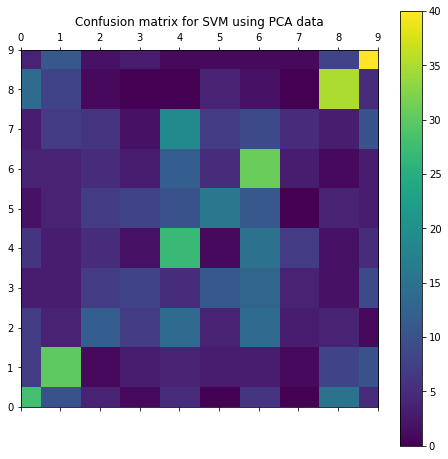

In [444]:
plot_confusion_matrix(svm_conf_mat_pca,'Confusion matrix for SVM using PCA data')

In [191]:
svm_precision_pca=precision_score(y_test_small_reversed,svm_pred_pca,average='micro')
svm_precision_pca

0.3314285714285714

In [192]:
svm_recall_pca=recall_score(y_test_small_reversed,svm_pred_pca,average='micro')
svm_recall_pca

0.3314285714285714

In [438]:
precisions_pca,recalls_pca,thresholds_pca=precision_recall_curve(y_test_small_reversed,svm_pred_pca)

ValueError: ignored

In [439]:
recall_90_precision = recalls_pca[np.argmax(precisions_pca >= 0.90)]
threshold_90_precision = thresholds_pca[np.argmax(precisions_pca >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions_pca, recalls_pca, thresholds_pca)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                      
plt.show()

IndexError: ignored

In [441]:
print(classification_report(y_test_small_reversed,svm_pred_pca))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        74
           1       0.36      0.43      0.39        70
           2       0.24      0.17      0.20        70
           3       0.22      0.12      0.16        65
           4       0.28      0.37      0.32        73
           5       0.31      0.25      0.27        65
           6       0.30      0.44      0.35        71
           7       0.21      0.07      0.11        71
           8       0.43      0.51      0.46        69
           9       0.44      0.56      0.49        72

    accuracy                           0.33       700
   macro avg       0.31      0.33      0.31       700
weighted avg       0.31      0.33      0.31       700



###SVM using original data vs data after normalization

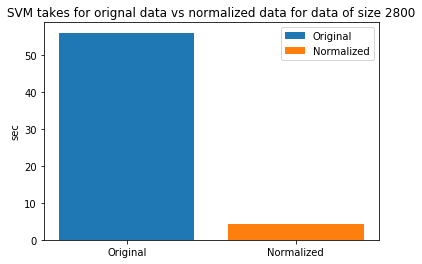

In [445]:
fig, h=plt.subplots()
h1=h.bar('Original',svm_original_time,label='Original')
h2=h.bar('Normalized',svm_time,label='Normalized')
h.set_title('SVM takes for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))
plt.legend(loc='best')
plt.ylabel('sec')
plt.show()

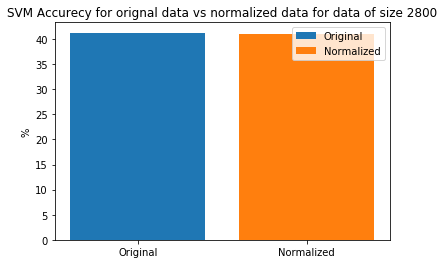

In [446]:
fig, h=plt.subplots()
h1=h.bar('Original',svm_acc_org*100,label='Original')
h2=h.bar('Normalized',svm_acc_pca*100,label='Normalized')
h.set_title('SVM Accurecy for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))
plt.legend(loc='best')
plt.ylabel('%')
plt.show()

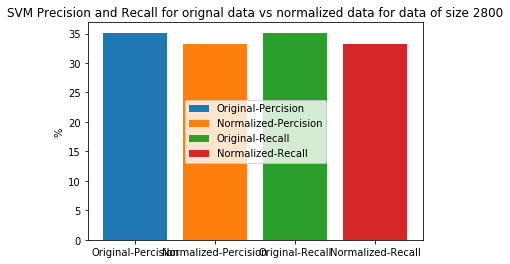

In [447]:
fig, h=plt.subplots()
h1=h.bar('Original-Percision',svm_precision_org*100,label='Original-Percision')
h2=h.bar('Normalized-Percision',svm_precision_pca*100,label='Normalized-Percision')
h3=h.bar('Original-Recall',svm_recall_org*100,label='Original-Recall')
h4=h.bar('Normalized-Recall',svm_recall_pca*100,label='Normalized-Recall')
h.set_title('SVM Precision and Recall for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))

plt.legend(loc='center')
plt.ylabel('%')
plt.autoscale()

plt.show()

###Conclusion

After building SVM model using original data (before normalization) and PCA data (after normalization). The accuracy, precision and recall for both data are almost same 41%, 35% and 32% . However, the PCA data has less features than original and gives us the same result.So, normalization makes building model faster

##KNN classifier

###KNN using original data

here, I am going to build knn model using the original data small that we use in svm to quickly build the model

In [217]:
knn_model = KNeighborsClassifier(n_neighbors=6)
time1= time.time()
knn_model.fit(x_train_org_small,y_train_org_small)
time2 = time.time()
knn_time_org = time2-time1
print('KNN with original data takes {:.1f} seconds'.format(knn_time_org))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNN with original data takes 1.2 seconds


Get the accuracy of the KNN

In [115]:
knn_acc_org = knn_model.score(x_test_org_small,y_test_org_small)
knn_acc_org

0.2542857142857143

In [0]:
cross_val_score(knn_model,x_test_org_small,y_test_org_small,cv=5,scoring='accuracy')

Genrate the confusion matrix

In [116]:
knn_pred_org=cross_val_predict(knn_model,x_test_org_small,y_test_org_small,cv=7)
knn_confusion_matrix_org = confusion_matrix(y_test_org_small,knn_pred_org)
knn_confusion_matrix_org

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when

array([[35,  0, 12,  0,  7,  0,  2,  1, 15,  0],
       [12,  1, 25,  1, 11,  2,  6,  1, 10,  1],
       [16,  0, 20,  3, 16,  1,  8,  1,  5,  1],
       [10,  0, 16,  7, 20,  5,  6,  1,  3,  1],
       [12,  0, 17,  2, 17,  2,  4,  6,  4,  0],
       [ 8,  1, 15,  6, 16,  9,  5,  1,  3,  1],
       [ 8,  0, 22,  4, 22,  1, 10,  1,  1,  0],
       [17,  0, 18,  3, 16,  3,  9,  4,  3,  3],
       [26,  0,  9,  0,  3,  0,  1,  0, 31,  2],
       [19,  0, 11,  6, 11,  1,  3,  4, 13,  4]])

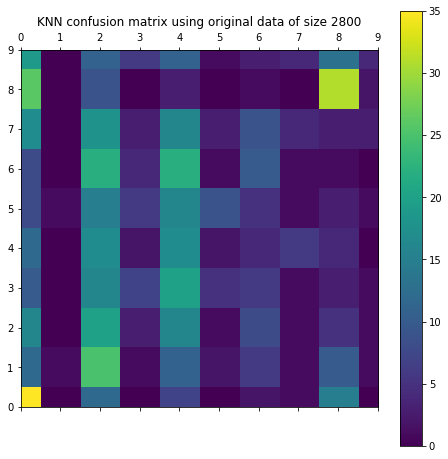

In [117]:
plot_confusion_matrix(knn_confusion_matrix_org,'KNN confusion matrix using original data of size {}'.format(x_train_org_small.shape[0]))

Get the precision and recall

In [118]:
knn_prec_org = precision_score(y_test_org_small,knn_pred_org,average='micro')
knn_prec_org

0.19714285714285715

In [121]:
knn_recall_org = recall_score(y_test_org_small,knn_pred_org,average='micro')
knn_recall_org

0.19714285714285715

###KNN using data after normalization

here, to build the KNN I will use the data after normalization x_train_small and y_train_small

In [218]:
knn_model = KNeighborsClassifier(n_neighbors=6)
time1= time.time()
knn_model.fit(x_train_small,y_train_small_reversed)
time2 = time.time()
knn_time_pca = time2-time1
print('KNN with normalized data takes {:.1f} seconds'.format(knn_time_org))

KNN with normalized data takes 1.2 seconds


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Get the accuracy

In [174]:
knn_acc_pca = knn_model.score(x_test_small,y_test_small_reversed)
knn_acc_pca

0.29428571428571426

In [220]:
cross_val_score(knn_model,x_test_small,y_test_small_reversed,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

array([0.27857143, 0.24285714, 0.21428571, 0.21428571, 0.22857143])

In [175]:
knn_pred_pca=cross_val_predict(knn_model,x_test_small,y_test_small_reversed,cv=7)
knn_confusion_matrix_pca = confusion_matrix(y_test_small_reversed,knn_pred_pca)
knn_confusion_matrix_pca

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when

array([[26,  0, 10,  0,  9,  2,  3,  0, 24,  0],
       [20,  4, 10,  1, 12,  3,  7,  1,  8,  4],
       [13,  2, 25,  3, 19,  1,  4,  1,  2,  0],
       [ 6,  1, 17,  2, 22,  4,  8,  1,  4,  0],
       [ 7,  0, 20,  1, 32,  1,  5,  1,  6,  0],
       [ 3,  1, 18,  3, 19,  4, 11,  2,  3,  1],
       [ 7,  0, 18,  1, 27,  2, 16,  0,  0,  0],
       [ 8,  2, 18,  0, 26,  2,  6,  2,  7,  0],
       [18,  0,  5,  1,  1,  1,  3,  0, 40,  0],
       [11,  3,  5,  0, 12,  0,  4,  2, 28,  7]])

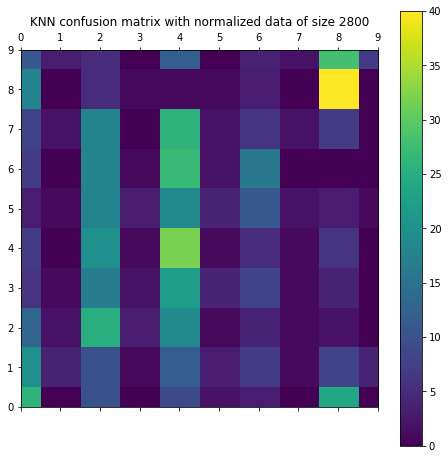

In [176]:
plot_confusion_matrix(knn_confusion_matrix_pca,'KNN confusion matrix with normalized data of size {}'.format(x_train_small.shape[0]))

Get the precision and recall

In [177]:
knn_prec_pca = precision_score(y_test_small_reversed,knn_pred_pca,average='micro')
knn_prec_pca

0.2257142857142857

In [178]:
knn_recall_pca = recall_score(y_test_small_reversed,knn_pred_pca,average='micro')
knn_recall_pca

0.2257142857142857

###KNN using original data vs data after normalization

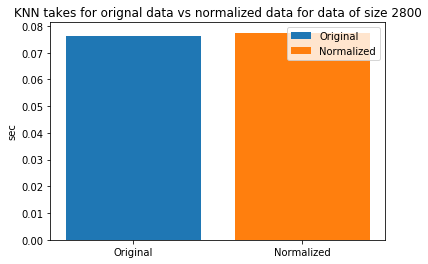

In [179]:
fig, h=plt.subplots()
h1=h.bar('Original',knn_time_org,label='Original')
h2=h.bar('Normalized',knn_time_pca,label='Normalized')
h.set_title('KNN takes for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_org_small.shape[0]))
plt.legend(loc='best')
plt.ylabel('sec')
plt.show()

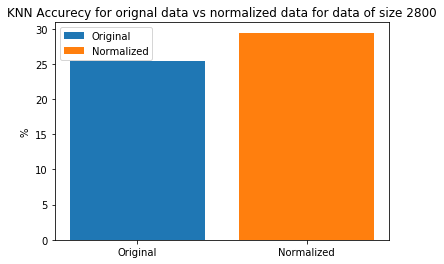

In [180]:
fig, h=plt.subplots()
h1=h.bar('Original',knn_acc_org*100,label='Original')
h2=h.bar('Normalized',knn_acc_pca*100,label='Normalized')
h.set_title('KNN Accurecy for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_org_small.shape[0]))
plt.legend(loc='best')
plt.ylabel('%')
plt.show()

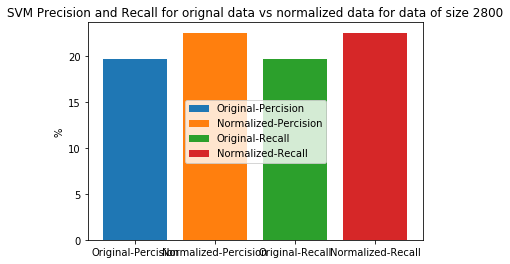

In [181]:
fig, h=plt.subplots()
h1=h.bar('Original-Percision',knn_prec_org*100,label='Original-Percision')
h2=h.bar('Normalized-Percision',knn_prec_pca*100,label='Normalized-Percision')
h3=h.bar('Original-Recall',knn_recall_org*100,label='Original-Recall')
h4=h.bar('Normalized-Recall',knn_recall_pca*100,label='Normalized-Recall')
h.set_title('KNN Precision and Recall for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))

plt.legend(loc='center')
plt.ylabel('%')
plt.autoscale()

plt.show()

###Conclusion

From the comparison in KNN using original data vs normalized data, we notice that KNN takes almost same time to be build using both data. However, the normalized data produce a model that has high accuracy, precision and recall. So, normalization increase the accuracy, precision and recall.

###SVM vs KNN

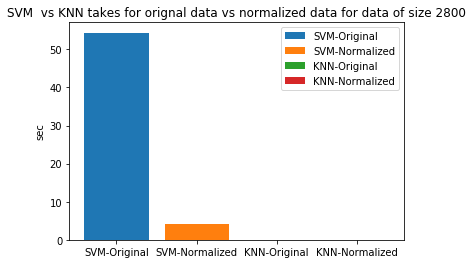

In [194]:
fig, h=plt.subplots()
h1=h.bar('SVM-Original',svm_original_time,label='SVM-Original')
h2=h.bar('SVM-Normalized',svm_time,label='SVM-Normalized')
h3=h.bar('KNN-Original',knn_time_org,label='KNN-Original')
h4=h.bar('KNN-Normalized',knn_time_pca,label='KNN-Normalized')
h.set_title('SVM  vs KNN takes for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))
plt.legend(loc='best')
plt.ylabel('sec')
plt.show()

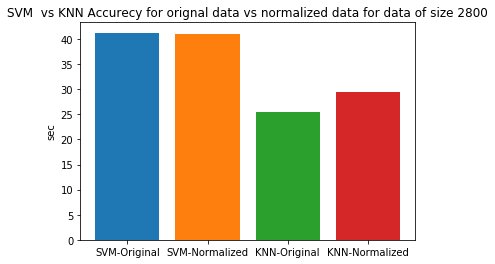

In [197]:
fig, h=plt.subplots()
h1=h.bar('SVM-Original',svm_acc_org*100,label='SVM-Original')
h2=h.bar('SVM-Normalized',svm_acc_pca*100,label='SVM-Normalized')
h3=h.bar('KNN-Original',knn_acc_org*100,label='KNN-Original')
h4=h.bar('KNN-Normalized',knn_acc_pca*100,label='KNN-Normalized')
h.set_title('SVM  vs KNN Accurecy for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))
plt.ylabel('%')
plt.show()

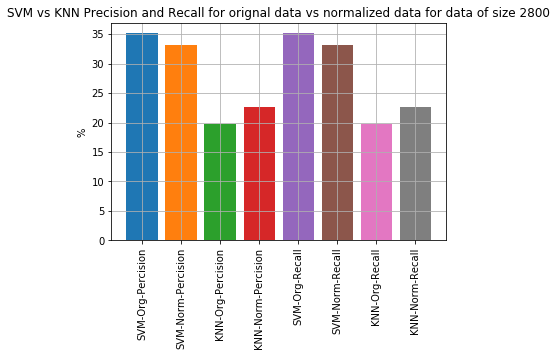

In [216]:
fig, h=plt.subplots()
h1=h.bar('SVM-Org-Percision',svm_precision_org*100,label='SVM-Org-Percision')
h2=h.bar('SVM-Norm-Percision',svm_precision_pca*100,label='SVM-Norm-Percision')
h3=h.bar('KNN-Org-Percision',knn_prec_org*100,label='KNN-Org-Percision')
h4=h.bar('KNN-Norm-Percision',knn_prec_pca*100,label='KNN-Norm-Percision')

h1=h.bar('SVM-Org-Recall',svm_recall_org*100,label='SVM-Org-Recall')
h2=h.bar('SVM-Norm-Recall',svm_recall_pca*100,label='SVM-Norm-Recall')
h3=h.bar('KNN-Org-Recall',knn_recall_org*100,label='KNN-Org-Recall')
h4=h.bar('KNN-Norm-Recall',knn_recall_pca*100,label='KNN-Norm-Recall')

h.set_title('SVM vs KNN Precision and Recall for orignal data vs normalized data for'+
            ' data of size {}'.format(x_train_small.shape[0]))
plt.ylabel('%')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#Summary

At the end, we conclude that KNN is faster than SVM. However, the SVM has higher accuracy, precision and recall than KNN. Therefore, KNN is good if you are concentrating on the speed in building the model which is will be helpful to be used online. SVM is good to use with data that rarely changed as is low in building the model 

#Refrences

http://www.cs.toronto.edu/~kriz/cifar.html

https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/03_classification.ipynb

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html